ASSN-6 : K Means



Name : V TEJAS

Register number : 3122 21 5001 116

Class : CSE - B

## Import necessary Modules

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

## Loading and Reading the Training and Testing Dataset

In [61]:
train_df=pd.read_csv("/content/drive/MyDrive/SEM-6/ML Lab/A-6/archive(4)/train.csv")
test_df=pd.read_csv("/content/drive/MyDrive/SEM-6/ML Lab/A-6/archive(4)/test.csv")

## Display the Details about Training and Testing Dataset details

In [62]:
print("\n\nThe Size of The Training Dataset : ",train_df.shape)
print("\nThe Size of The Training Dataset : ",test_df.shape)



The Size of The Training Dataset :  (7352, 563)

The Size of The Training Dataset :  (2947, 563)


## Printing The Training and Testing Dataset Examples

In [63]:
train_df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [64]:
test_df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


## Data Preprocessing ( Handling Missing values )

In [65]:
print("The Missing Values in The Training Dataset\n\n",train_df.isnull().sum())

The Missing Values in The Training Dataset

 tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


In [66]:
print("The Missing Values in The Testing Dataset\n\n",test_df.isnull().sum())

The Missing Values in The Testing Dataset

 tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


## Display The Features in Dataset

In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [68]:
x=train_df.drop(columns={"Activity"})
y=train_df["Activity"]

## Feature Engineering Techniques

1) Select Best K       (  Filter method )

2) Ridge Regression    (  Embedded Method )

3) PCA


# 1) Select Best K  (  Filter method )

In [69]:
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(x, y)
np.set_printoptions(precision=10)

features = fit.transform(x)

selected_indices = fit.get_support(indices=True)

selected_feature_names = x.columns[selected_indices]

print("Selected feature names : \n")
print(selected_feature_names)

Selected feature names : 

Index(['tGravityAcc-mean()-X', 'tGravityAcc-max()-X', 'tGravityAcc-min()-X',
       'fBodyAccJerk-entropy()-X', 'fBodyAccJerk-entropy()-Y'],
      dtype='object')


In [70]:
train_df1 = train_df[selected_feature_names].copy()
test_df1 = test_df[selected_feature_names].copy()

In [71]:
print("\nAfter Feature Selection The Shape of The Training Dataset : ",train_df1.shape)
print("After Feature Selection The Shape of The Testing Dataset  : ",test_df1.shape)


After Feature Selection The Shape of The Training Dataset :  (7352, 5)
After Feature Selection The Shape of The Testing Dataset  :  (2947, 5)


In [72]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
kmeans.fit(train_df1)
train_clusters = kmeans.predict(train_df1)
test_clusters = kmeans.predict(test_df1)
cluster_centroids = kmeans.cluster_centers_

In [73]:
silhouette_avg11 = silhouette_score(train_df1, train_clusters)
silhouette_avg12 = silhouette_score(test_df1, test_clusters)
print(f"Silhouette Score ( Training dataset )   : {silhouette_avg11}")
print(f"Silhouette Score ( Testing dataset  )   : {silhouette_avg12}")

Silhouette Score ( Training dataset )   : 0.8270090285139965
Silhouette Score ( Testing dataset  )   : 0.830854104944898


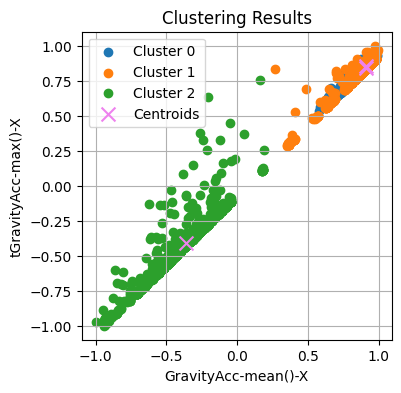

In [74]:
plt.figure(figsize=(4, 4))

for cluster in range(n_clusters):
    cluster_data = train_df1[train_clusters == cluster]

    plt.scatter(cluster_data['tGravityAcc-mean()-X'], cluster_data['tGravityAcc-max()-X'], label=f'Cluster {cluster}')

plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], marker='x', color='violet', s=100, label='Centroids')

plt.title('Clustering Results')
plt.xlabel('GravityAcc-mean()-X')
plt.ylabel('tGravityAcc-max()-X')
plt.legend()
plt.grid(True)
plt.show()

# 2) Ridge Regression    (  Embedded Method )

In [75]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

ridge = Ridge(alpha=1.0)
select_from_model = SelectFromModel(ridge, max_features=8)
select_from_model.fit(x, y_encoded)
features_selected = select_from_model.transform(x)
selected_indices = select_from_model.get_support(indices=True)
selected_feature_names = x.columns[selected_indices]
print("Selected feature names : \n")
print(selected_feature_names)

Selected feature names : 

Index(['tBodyAcc-std()-X', 'tBodyAcc-sma()', 'tGravityAcc-std()-X',
       'tBodyGyroJerk-std()-Z', 'tBodyGyroJerk-energy()-Z', 'fBodyAcc-std()-X',
       'fBodyGyro-bandsEnergy()-9,16.2', 'fBodyGyro-bandsEnergy()-17,32.2'],
      dtype='object')


In [76]:
train_df2 = train_df[selected_feature_names].copy()
test_df2 = test_df[selected_feature_names].copy()

In [77]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
kmeans.fit(train_df2)
train_clusters = kmeans.predict(train_df2)
test_clusters = kmeans.predict(test_df2)
cluster_centroids = kmeans.cluster_centers_

In [78]:
silhouette_avg21 = silhouette_score(train_df2, train_clusters)
silhouette_avg22 = silhouette_score(test_df2, test_clusters)
print(f"Silhouette Score ( Training dataset )   : {silhouette_avg21}")
print(f"Silhouette Score ( Testing dataset  )   : {silhouette_avg22}")

Silhouette Score ( Training dataset )   : 0.7140380577893611
Silhouette Score ( Testing dataset  )   : 0.7355803254687658


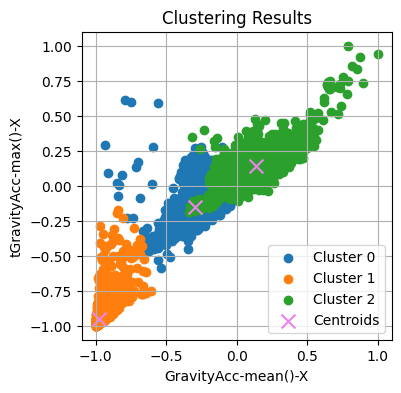

In [79]:
plt.figure(figsize=(4, 4))

for cluster in range(n_clusters):
    cluster_data = train_df2[train_clusters == cluster]

    plt.scatter(cluster_data['tBodyAcc-std()-X'], cluster_data['tBodyAcc-sma()'], label=f'Cluster {cluster}')

plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], marker='x', color='violet', s=100, label='Centroids')

plt.title('Clustering Results')
plt.xlabel('GravityAcc-mean()-X')
plt.ylabel('tGravityAcc-max()-X')
plt.legend()
plt.grid(True)
plt.show()

# 3) PCA

In [80]:
pca = PCA(n_components=11)

pca.fit(x)

selected_feature_indices = pca.components_

selected_feature_names = [x.columns[i] for i in range(len(selected_feature_indices))]

print("Selected feature names:")
print(selected_feature_names)


Selected feature names:
['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y']


In [81]:
train_df3 = train_df[selected_feature_names].copy()
test_df3 = test_df[selected_feature_names].copy()

In [82]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
kmeans.fit(train_df3)
train_clusters = kmeans.predict(train_df3)
test_clusters = kmeans.predict(test_df3)
cluster_centroids = kmeans.cluster_centers_

In [83]:
silhouette_avg31 = silhouette_score(train_df3, train_clusters)
silhouette_avg32 = silhouette_score(test_df3, test_clusters)
print(f"Silhouette Score ( Training dataset )   : {silhouette_avg31}")
print(f"Silhouette Score ( Testing dataset  )   : {silhouette_avg32}")

Silhouette Score ( Training dataset )   : 0.6488163273987868
Silhouette Score ( Testing dataset  )   : 0.6478744052260157


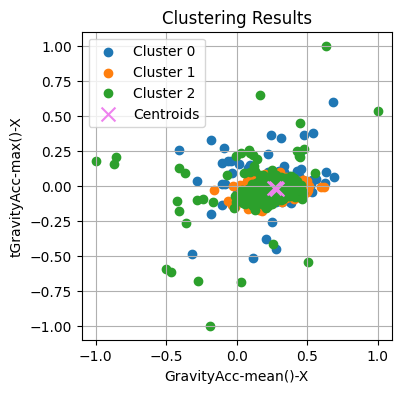

In [84]:
plt.figure(figsize=(4, 4))

for cluster in range(n_clusters):
    cluster_data = train_df3[train_clusters == cluster]

    plt.scatter(cluster_data['tBodyAcc-mean()-X'], cluster_data['tBodyAcc-mean()-Y'], label=f'Cluster {cluster}')

plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], marker='x', color='violet', s=100, label='Centroids')

plt.title('Clustering Results')
plt.xlabel('GravityAcc-mean()-X')
plt.ylabel('tGravityAcc-max()-X')
plt.legend()
plt.grid(True)
plt.show()

-1 <= Silhouette score <= 1

A Silhouette score of  1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.


A Silhouette score of  0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.


A Silhouette score of -1 indicates that the object is poorly matched to its own cluster and well matched to neighboring clusters.

1) Select Best K  (  Filter method )

print(f"Silhouette Score ( Training dataset )   : {silhouette_avg11}")
print(f"Silhouette Score ( Testing dataset  )   : {silhouette_avg12}")


2) Ridge Regression

print(f"Silhouette Score ( Training dataset )   : {silhouette_avg21}")
print(f"Silhouette Score ( Testing dataset  )   : {silhouette_avg22}")

3) PCA

print(f"Silhouette Score ( Training dataset )   : {silhouette_avg31}")
print(f"Silhouette Score ( Testing dataset  )   : {silhouette_avg32}")

In [85]:
print("\n\n1) Select Best K  (  Filter method )")

print(f"Silhouette Score ( Training dataset )   : {silhouette_avg11}")
print(f"Silhouette Score ( Testing dataset  )   : {silhouette_avg12}")


print("\n\n2) Ridge Regression")

print(f"Silhouette Score ( Training dataset )   : {silhouette_avg21}")
print(f"Silhouette Score ( Testing dataset  )   : {silhouette_avg22}")

print("\n\n3) PCA")

print(f"Silhouette Score ( Training dataset )   : {silhouette_avg31}")
print(f"Silhouette Score ( Testing dataset  )   : {silhouette_avg32}")



1) Select Best K  (  Filter method )
Silhouette Score ( Training dataset )   : 0.8270090285139965
Silhouette Score ( Testing dataset  )   : 0.830854104944898


2) Ridge Regression
Silhouette Score ( Training dataset )   : 0.7140380577893611
Silhouette Score ( Testing dataset  )   : 0.7355803254687658


3) PCA
Silhouette Score ( Training dataset )   : 0.6488163273987868
Silhouette Score ( Testing dataset  )   : 0.6478744052260157


### The Model which was build using the Select best K feature Engineering techniques gives the best Silhouette Score. So This is the Best Model